In [1]:
import psycopg2
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from dotenv import load_dotenv
import os
from  src.database import connect
from src.pgn_parser import parse_moves



## Mes parties d'echecs

source chesscom pseudo gabrielpizzo

In [32]:
conn = connect()
query = """
SELECT cg.date,
        cg.date,
        cg.white_player,
        cg.black_player,
        cg.result,
        cg.black_elo,
        cg.white_elo,
        cg.time_control,
        cg.termination,
        cg.moves
FROM chess_games cg
"""
df = pd.read_sql_query(query, conn)
conn.close()

df.head()

/tmp/ipykernel_51302/2867011540.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,date,date,white_player,black_player,result,black_elo,white_elo,time_control,termination,moves
0,2024-02-13,2024-02-13,gabrielpizzo,BryMan222,1-0,1028,1068,300,gabrielpizzo a gagné au temps,e2e4 b7b6 g1f3 c8b7 b1c3 e7e6 d2d4 f8b4 f1d3 g...
1,2024-02-13,2024-02-13,jsum3,gabrielpizzo,0-1,1075,1009,300,gabrielpizzo a gagné au temps,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...
2,2024-02-13,2024-02-13,gabrielpizzo,ahepburn94,0-1,1098,1067,300,ahepburn94 a gagné par échec et mat,e2e4 g7g6 g1f3 f8g7 d2d4 d7d6 c1e3 g8f6 b1c3 e...
3,2024-02-13,2024-02-13,krascko,gabrielpizzo,0-1,1074,1024,300,gabrielpizzo a gagné au temps,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...
4,2024-02-13,2024-02-13,gabrielpizzo,GrosJoLav,0-1,1035,1065,300,GrosJoLav a gagné par échec et mat,e2e4 d7d5 e4d5 d8d5 b1c3 d5a5 d2d4 g8f6 g1f3 b...


In [33]:
def parse_moves(moves):
    move_list = moves.split()
    num_moves = len(move_list)
    first_n_moves = ' '.join(move_list[:3]) if num_moves >= 3 else ''
    return num_moves, first_n_moves

# Column to indicate if gabrielpizzo won or drew the game
def determine_result(row):
    if row['white_player'] == "gabrielpizzo" and row['result'] == "1-0":
        return "Win"
    elif row['black_player'] == "gabrielpizzo" and row['result'] == "0-1":
        return "Win"
    elif row['result'] == "1/2-1/2":
        return "Draw"
    else:
        return "Loss"

df['gabrielpizzo_result'] = df.apply(determine_result, axis=1)

# Column to indicate if gabrielpizzo played as white or black
df['gabrielpizzo_color'] = df.apply(lambda row: 'White' if row['white_player'] == 'gabrielpizzo' else 'Black', axis=1)


In [34]:
df[['num_moves', 'first_three_moves']] = df['moves'].apply(parse_moves).apply(pd.Series)

In [35]:
df.head()

,date,date,white_player,black_player,result,black_elo,white_elo,time_control,termination,moves,gabrielpizzo_result,gabrielpizzo_color,num_moves,first_three_moves
0,2024-02-13,2024-02-13,gabrielpizzo,BryMan222,1-0,1028,1068,300,gabrielpizzo a gagné au temps,e2e4 b7b6 g1f3 c8b7 b1c3 e7e6 d2d4 f8b4 f1d3 g...,Win,White,107,e2e4 b7b6 g1f3
1,2024-02-13,2024-02-13,jsum3,gabrielpizzo,0-1,1075,1009,300,gabrielpizzo a gagné au temps,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...,Win,Black,110,e2e4 e7e5 g1f3
2,2024-02-13,2024-02-13,gabrielpizzo,ahepburn94,0-1,1098,1067,300,ahepburn94 a gagné par échec et mat,e2e4 g7g6 g1f3 f8g7 d2d4 d7d6 c1e3 g8f6 b1c3 e...,Loss,White,38,e2e4 g7g6 g1f3
3,2024-02-13,2024-02-13,krascko,gabrielpizzo,0-1,1074,1024,300,gabrielpizzo a gagné au temps,e2e4 e7e5 g1f3 b8c6 f1c4 f8c5 c2c3 g8f6 d2d3 e...,Win,Black,134,e2e4 e7e5 g1f3
4,2024-02-13,2024-02-13,gabrielpizzo,GrosJoLav,0-1,1035,1065,300,GrosJoLav a gagné par échec et mat,e2e4 d7d5 e4d5 d8d5 b1c3 d5a5 d2d4 g8f6 g1f3 b...,Loss,White,30,e2e4 d7d5 e4d5


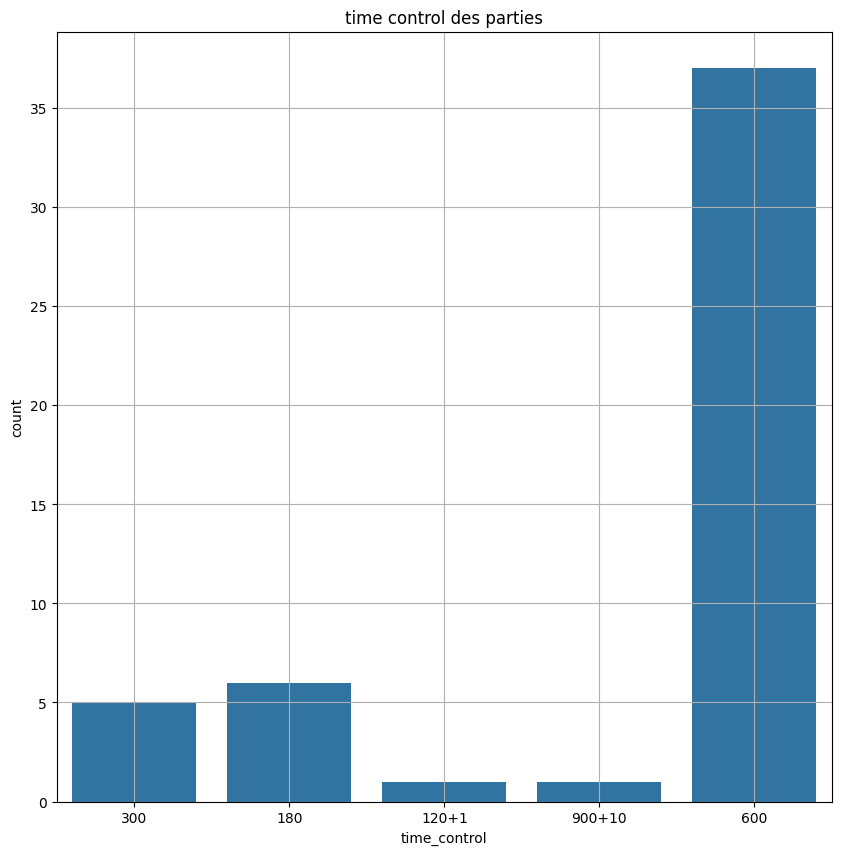

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="time_control")
plt.title("time control des parties")
plt.grid()

In [43]:
df= df[df["time_control"]=='600']

/tmp/ipykernel_51302/4015931970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top_3, x="first_three_moves", order=top_3_moves, palette="viridis")


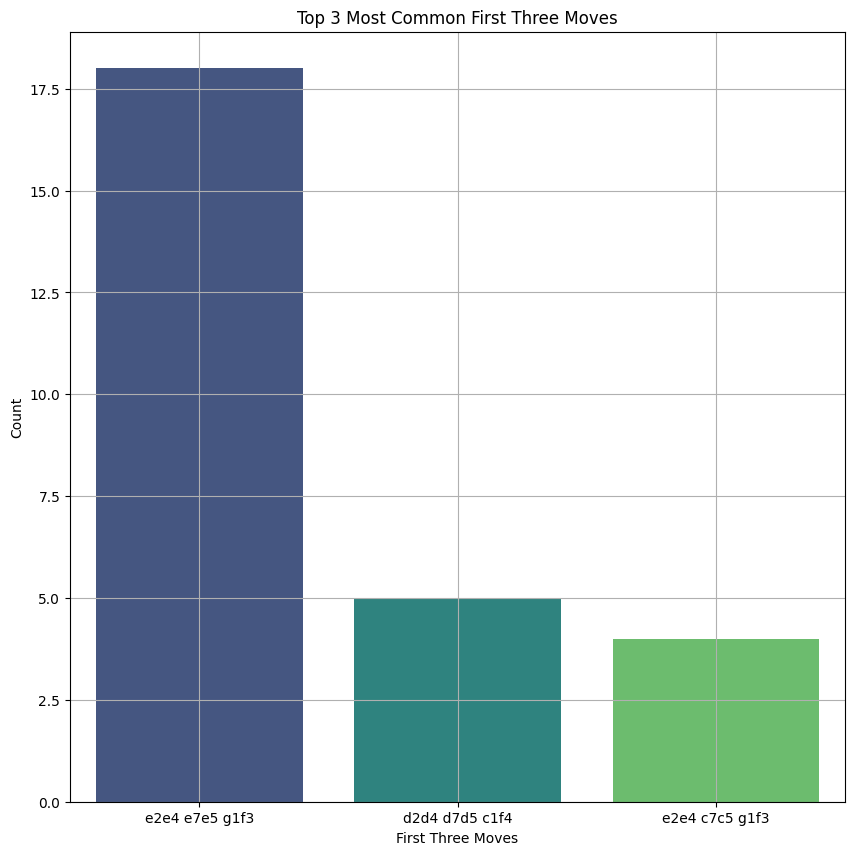

In [45]:
top_3_moves = df['first_three_moves'].value_counts().nlargest(3).index

# Filter the DataFrame to include only the top 3 most common first three moves
df_top_3 = df[df['first_three_moves'].isin(top_3_moves)]

# Set up the plot
plt.figure(figsize=(10, 10))
sns.countplot(data=df_top_3, x="first_three_moves", order=top_3_moves, palette="viridis")
plt.grid()
plt.title("Top 3 Most Common First Three Moves")
plt.xlabel("First Three Moves")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_51302/1096021348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_3['count'] = df_top_3.groupby(['first_three_moves', 'gabrielpizzo_result'])['first_three_moves'].transform('count')
/tmp/ipykernel_51302/1096021348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_3['percentage'] = df_top_3['count'] / df_top_3.groupby('first_three_moves')['first_three_moves'].transform('count') * 100


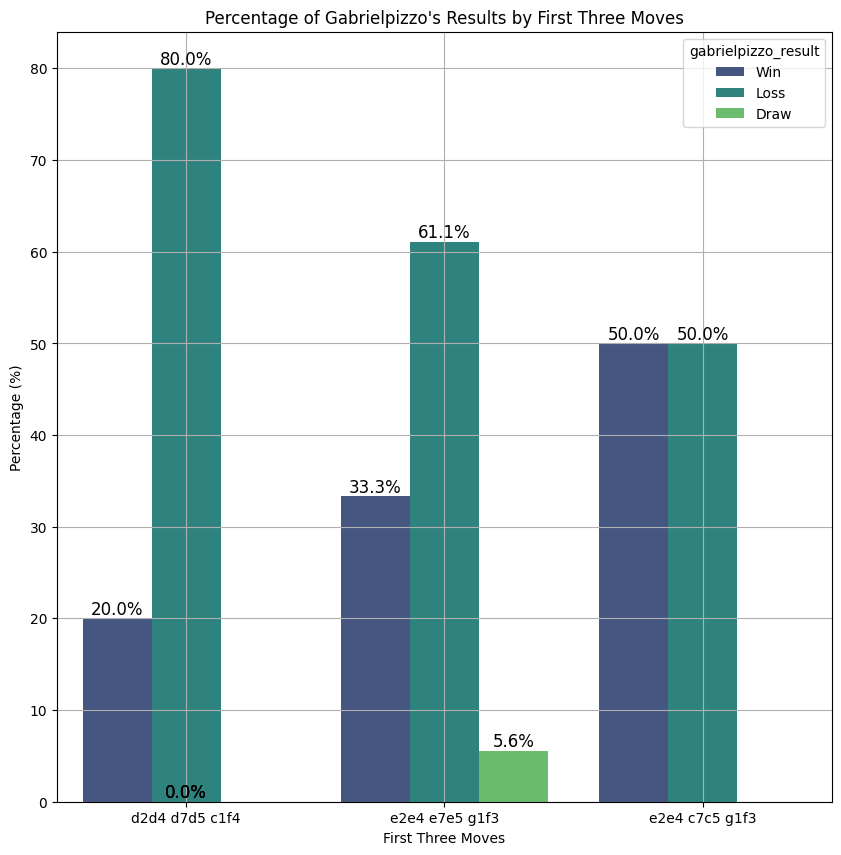

In [46]:
# Filter the DataFrame to include only the top 3 most common first three moves
top_3_moves = df['first_three_moves'].value_counts().nlargest(3).index
df_top_3 = df[df['first_three_moves'].isin(top_3_moves)]

# Calculate the percentages
df_top_3['count'] = df_top_3.groupby(['first_three_moves', 'gabrielpizzo_result'])['first_three_moves'].transform('count')
df_top_3['percentage'] = df_top_3['count'] / df_top_3.groupby('first_three_moves')['first_three_moves'].transform('count') * 100

# Set up the plot
plt.figure(figsize=(10, 10))
sns.barplot(data=df_top_3, x="first_three_moves", y="percentage", hue="gabrielpizzo_result", palette="viridis")

# Add percentages on top of the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=12)

plt.title("Percentage of Gabrielpizzo's Results by First Three Moves")
plt.ylabel("Percentage (%)")
plt.xlabel("First Three Moves")
plt.grid()
plt.show()